# Titanic Passanger Survival Analysis

- We have utilized ML here by comparing a predefined test data set and a randomly data generated train dataset

- We run the train data many machine learning models multiple times until the accuracy starts droppping.

- We run it through multiple Machine learning models and returning the output for the one with the highest accuracy

## Contributors

- C013: Ashmit Jain

- C035: Sukhada Gulhane

- C046: Neerav Reddy

- C058: Tanay Shah

## Links


In [1]:
from IPython.display import Image 
#IPython's display module to render/display an image in a Jupyter Notebook or IPython environment
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")
#a direct URL to the image hosted online

Hello


Loading in the Image


In [2]:
import pandas as pd  #assigned it as pd and is used as data manipulation and analysis working with the csv files
import numpy as np  #assigned it as np and is used as a helper for pandas

Importing some necessary Packages:

pandas: data analysis

numpy: as helper for pandas


In [3]:
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")
# using the pandas library to read data from CSV files and store them into df objects named train and test

Importing the CSV files and storing it in train and test variable respectively


In [4]:
print("Train Shape:",train.shape)
print("Test Shape:",test.shape)
#to print the dimensions (number of rows and columns) of the train and test df

Train Shape: (891, 12)
Test Shape: (418, 11)


.shape tells us the dimensions of the dataset: here row x column


In [5]:
train.info() #summary information about the df train (index info, col info like non null, datatype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Tells us the entire information about the dataset at hand:

Here it is providing us with the total number of non-null values and datatype

int64 the same as long int

object -> string


In [6]:
test.info() #summary information about the df test (index info, col info like non null, datatype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


### Data Dictionary

- Survived: 0 = No, 1 = Yes
- pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- sibsp: # of siblings / spouses aboard the Titanic
- parch: # of parents / children aboard the Titanic
- ticket: Ticket number
- cabin: Cabin number
- embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

**Total rows and columns**

We can see that there are 891 rows and 12 columns in our training dataset.


In [7]:
train.head(10) #prints the first 10 rows of train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Selecting first 10 rows of the dataset


In [8]:
train.describe() #it provides descriptive statistics for numerical columns in the Df train (std - standard deviation, % - percentile)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Prints data for

- count
- mean
- std
- min
  etc


In [9]:
test.describe() #it provides descriptive statistics for numerical columns in the Df test (std - standard deviation, % - percentile)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
train.isnull().sum() # counts the number of missing values(null or NaN)in each column of the DataFrame train.
# isnull() -> prints true or false .sum() -> treats true as 1 false as 0

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test.isnull().sum() #same as train
test["Survived"] = "" # assigns an empty string "" to all rows in this column (future use, storing prediction)
test.head() #prints the first 5 rows

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,


Emptying the survived column


# Data Visualization using Matplotlib and Seaborn packages.


In [12]:
import matplotlib.pyplot as plt # used plotting library for creating visualizations and plots.
%matplotlib inline 
# to display plots directly in the notebook output cells if not then opens externally
import seaborn as sns # a high-level interface for informative statistical graphics.
sns.set() # setting seaborn default for plots (colors)

Importing plotting libraries

sns.set() is to sett seaborn default for plots


# Bar Chart for Categorical Features

- Pclass
- Sex
- SibSp ( # of siblings and spouse)
- Parch ( # of parents and children)
- Embarked
- Cabin


In [13]:
def bar_chart(feature): #parameter feature (unique values)
    survived = train[train['Survived']==1][feature].value_counts()
    #selects rows from the train Df where the 'Survived' column has a value of 1(indicating survival), then counts the occurrences of each unique value in the specified feature 
    dead = train[train['Survived']==0][feature].value_counts() #same but with who didnt survive (so 0)
    df = pd.DataFrame([survived,dead]) # list of series represents the count of unique values for survived and dead passengers
    df.index = ['Survived','Dead'] #to represent the survival status it sets the index of df
    df.plot(kind='bar',stacked=True, figsize=(10,5)) #plots a bar chart, stacks the bars(Survived and Dead) on top of each other, (width, height)

### Bar_chart Fucntion

survived and dead values are counted up and stored in two variables

- feature means: what we are selected, here: sex

dataFrame created for the variables

- columns are survived and dead

creating an index for them

plotting it


Survived :
 Sex
female    233
male      109
Name: count, dtype: int64
Dead:
 Sex
male      468
female     81
Name: count, dtype: int64


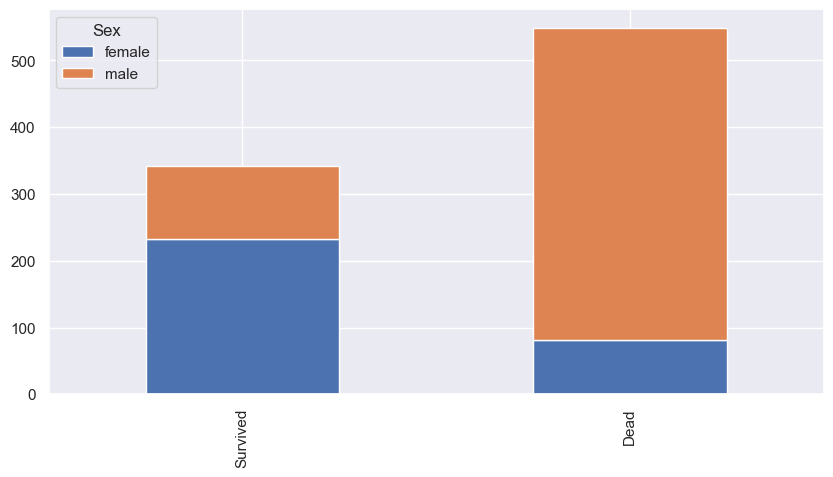

In [14]:
bar_chart('Sex') #calls the bar_chart fun with the argument sex, bar chart comparing the survival status based on the passengers Sex
print("Survived :\n",train[train['Survived']==1]['Sex'].value_counts())
#selects rows from the train Df where the 'Survived' column has a value of 1(indicating survival), then counts the occurrences of each unique value in the specified sex
print("Dead:\n",train[train['Survived']==0]['Sex'].value_counts())
#same but with 0 cause dead

Calling function bar_chart passing value Sex


The Chart confirms **Women more likely survivied than Men**.


Survived :
 Pclass
1    136
3    119
2     87
Name: count, dtype: int64
Dead:
 Pclass
3    372
2     97
1     80
Name: count, dtype: int64


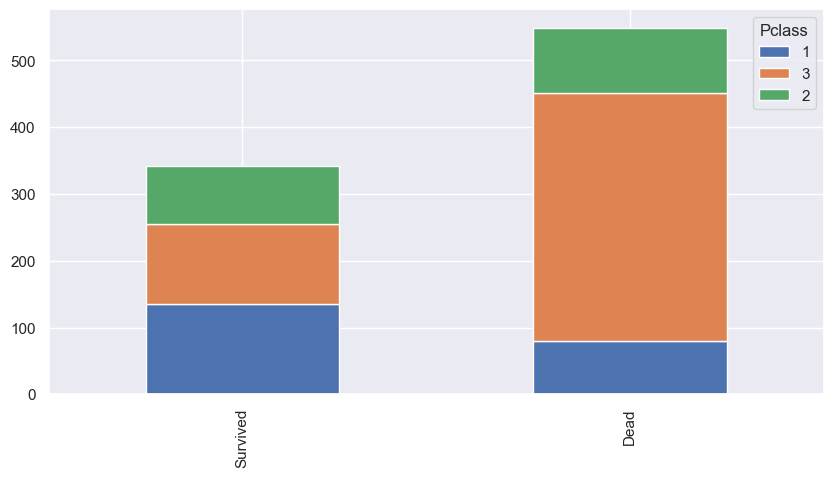

In [15]:
bar_chart('Pclass') #the survival status based on the passengers' ticket class (Pclass)
print("Survived :\n",train[train['Survived']==1]['Pclass'].value_counts()) #prints the survivors and same for every class
print("Dead:\n",train[train['Survived']==0]['Pclass'].value_counts()) #dead is 0

The Chart confirms **1st class** more likely survivied than **other classes**.  
The Chart confirms **3rd class** more likely dead than **other classes**


Passing value Pclass (passenger class) to function bar_chart


Survived :
 SibSp
0    210
1    112
2     13
3      4
4      3
Name: count, dtype: int64
Dead:
 SibSp
0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: count, dtype: int64


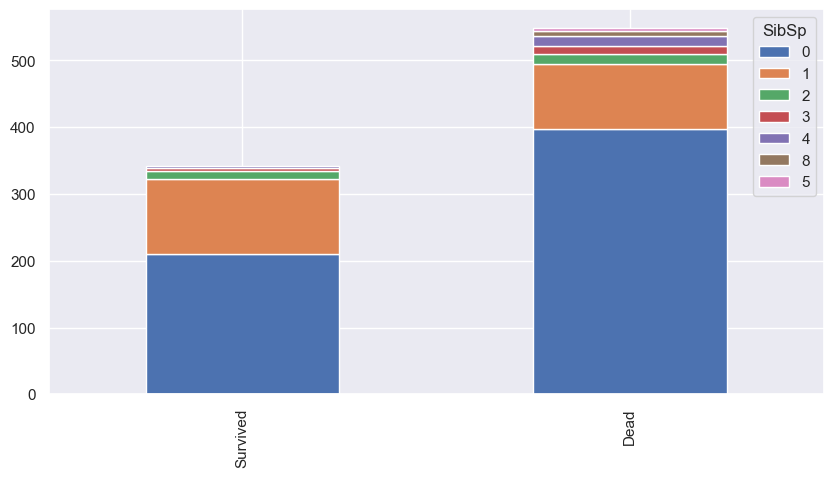

In [16]:
bar_chart('SibSp') #survival status based on the number of siblings or spouses (SibSp) 
print("Survived :\n",train[train['Survived']==1]['SibSp'].value_counts()) #prints the survivors and same as other class
print("Dead:\n",train[train['Survived']==0]['SibSp'].value_counts())

The Chart confirms a **person aboarded with more than 2 siblings or spouse** more likely survived.  
The Chart confirms a **person aboarded without siblings or spouse** more likely dead


Survived :
 Parch
0    233
1     65
2     40
3      3
5      1
Name: count, dtype: int64
Dead:
 Parch
0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: count, dtype: int64


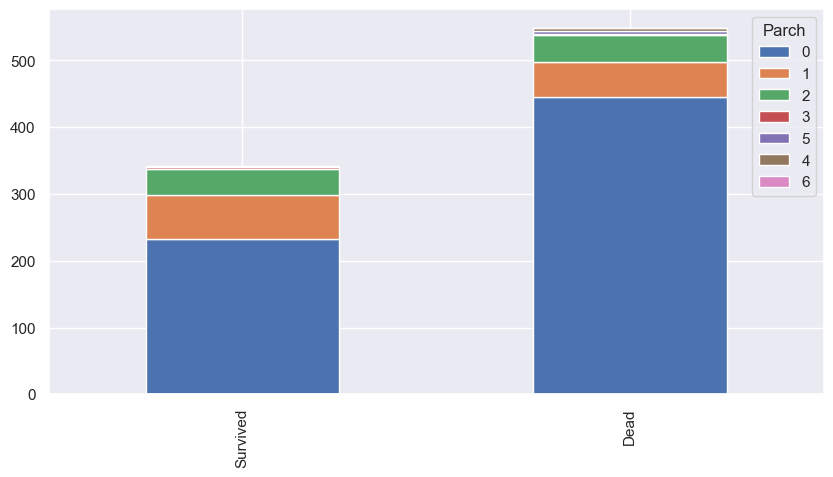

In [17]:
bar_chart('Parch') #survival status based on the number of parents or children (Parch)
print("Survived :\n",train[train['Survived']==1]['Parch'].value_counts()) #prints the count of survivors in each category and same as other classes
print("Dead:\n",train[train['Survived']==0]['Parch'].value_counts())

The Chart confirms a **person aboarded with more than 2 parents or children more likely survived.**  
The Chart confirms a **person aboarded alone more likely dead**


Survived :
 Embarked
S    217
C     93
Q     30
Name: count, dtype: int64
Dead:
 Embarked
S    427
C     75
Q     47
Name: count, dtype: int64


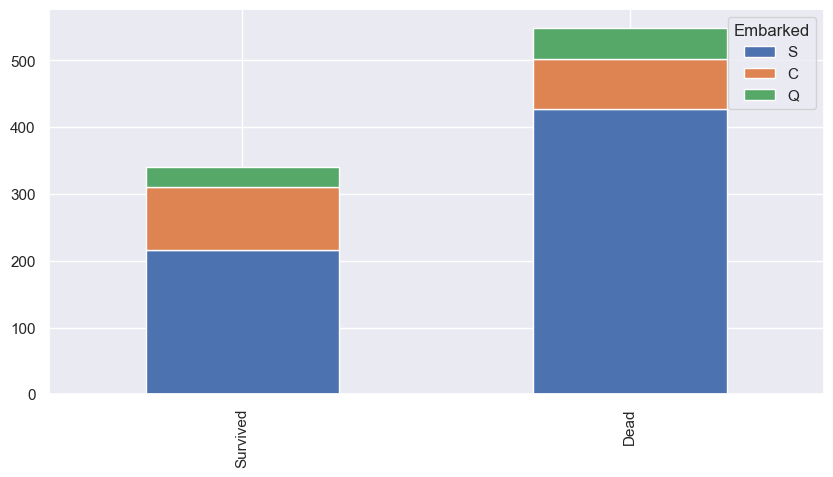

In [18]:
bar_chart('Embarked') #survival status based on the port of embarkation for passengers
print("Survived :\n",train[train['Survived']==1]['Embarked'].value_counts()) #prints the count of survivors for each category of Embarked and same..
print("Dead:\n",train[train['Survived']==0]['Embarked'].value_counts())

The Chart confirms a **person aboarded from C** slightly more likely survived.  
The Chart confirms a **person aboarded from Q** more likely dead.  
The Chart confirms a **person aboarded from S** more likely dead.


## 4. Feature engineering


Feature engineering is the process of using domain knowledge of the data
to create features (**feature vectors**) that make machine learning algorithms work.

feature vector is an n-dimensional vector of numerical features that represent some object.
Many algorithms in machine learning require a numerical representation of objects,
since such representations facilitate processing and statistical analysis.


In [19]:
train.head() #prints the first few rows of train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 4.1 how titanic sank?


In [20]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")
#to display the image and tells the format

In [21]:
train.head(10) #prints the first 10 rows of train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [22]:
train_test_data = [train,test] # list is created to loop through both datasets and perform the same operation on each
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    #applies the str.extract() method to the 'Name' column of the current DF(dataset), the pattern is designed to capture titles from names that typically follow the format "Last Name, Title. First Name", result is returned as a series 

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
C:\Users\91809\AppData\Local\Temp\ipykernel_31960\3591736586.py:3: SyntaxWarning: invalid escape sequence '\.'
  dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


Creating a 3-D Data set, where the train and test


In [23]:
train['Title'].value_counts() # (titles extracted from the passengers' names)
#to count the occurrences of each unique value(title) in the 'Title' column of the Df train. 

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

value counts for all the titles


In [24]:
test['Title'].value_counts() # titles extracted from the passengers' names
#to count the occurrences of each unique value(title) in the 'Title' column of the Df test. 

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

### Title Map

Assigning values to People with titles as follows

Mr : 0  
Miss : 1  
Mrs: 2  
Others: 3


In [25]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
#passenger names to numeric values
for dataset in train_test_data: #this loop allows the code to apply the same transformation to both datasets
    dataset['Title'] = dataset["Title"].map(title_mapping) #used to map the titles in the 'Title' column of each dataset according to the dict, .map methon applies mapping

### Inside Train-test_data which is a combination of train, test

Dataset = train and then dataset = test, in first and then second interation respectively


In [26]:
dataset.head() #prints the first few rows of dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,,2


Head selects first 5 rows


In [27]:
test.head() #prints the first few rows of test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,,2


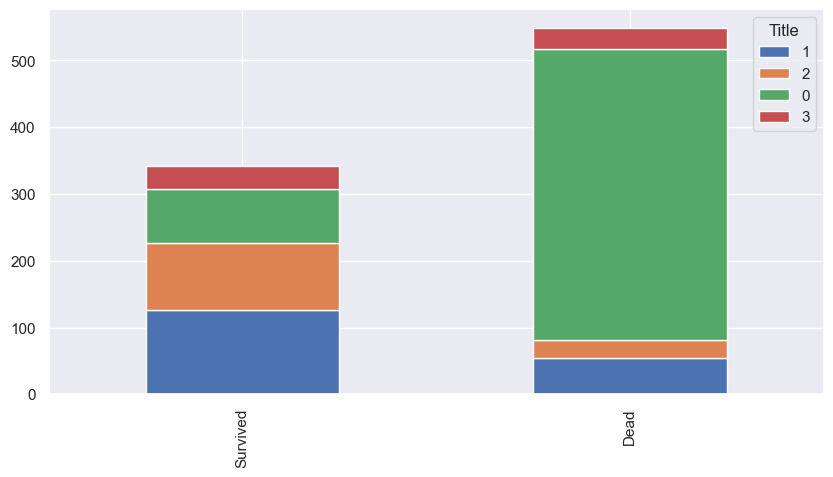

In [28]:
bar_chart('Title') #barchart for title

Barchart for title


In [29]:
# delete unnecessary feature from dataset
# removes the 'Name' column from both the train and test DataFrames, axis=1 specifies that the operation is performed along columns, operation should be applied directly to the Df train modifying it in place without returning a new Df.
train.drop('Name', axis=1, inplace=True)  
test.drop('Name', axis=1, inplace=True)

Deleting name column, because not needed by ML


In [30]:
train.head() #prints the first few rows of train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


printing first 5 rows to check


In [31]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    #this line maps the values in the 'Sex' column of each Df to their corresponding numerical values according to the dict
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

Mapping males and females as 0s and 1s


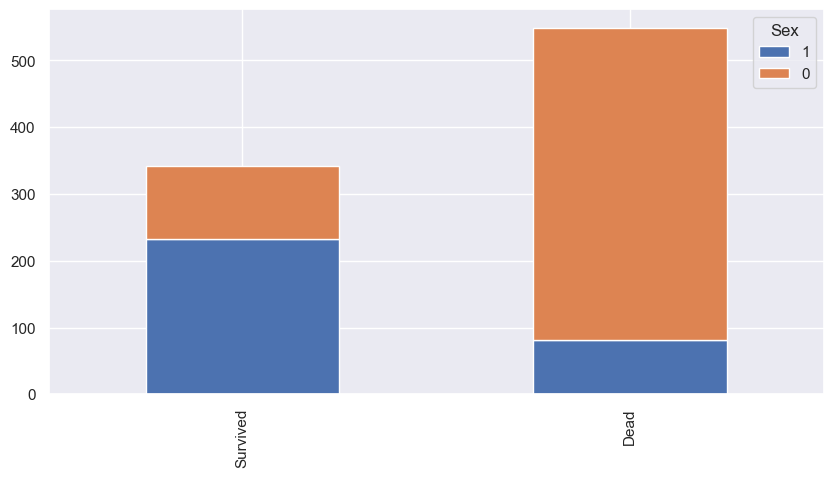

In [32]:
bar_chart('Sex') #bar chart of sex

Making Bar_chart


In [33]:
test.head() #prints the first few rows of test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,,2


Printing first 5 rows to check


In [34]:
#it fills missing values in the 'Age' column of both the train and test Df using the median age corresponding to each passenger's title
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace= True) 
#.fillna() method is used to fill missing values, groups the Df by the 'Title' column and 'Age' column for further operations
test["Age"].fillna(test.groupby('Title')['Age'].transform("median"), inplace= True)

C:\Users\91809\AppData\Local\Temp\ipykernel_31960\3509507485.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace= True)
C:\Users\91809\AppData\Local\Temp\ipykernel_31960\3509507485.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

Sukhada explain


In [35]:
train.head(30) #prints the first 30 rows of train
#train.groupby("Title")["Age"].transform("median")

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


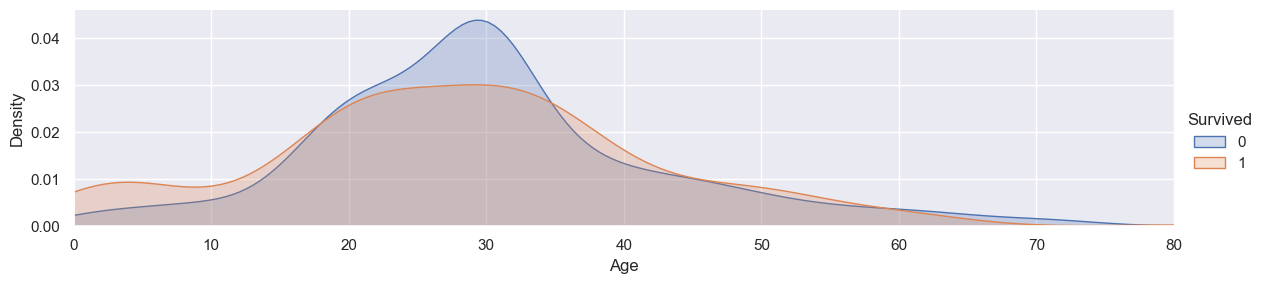

(10.0, 50.0)

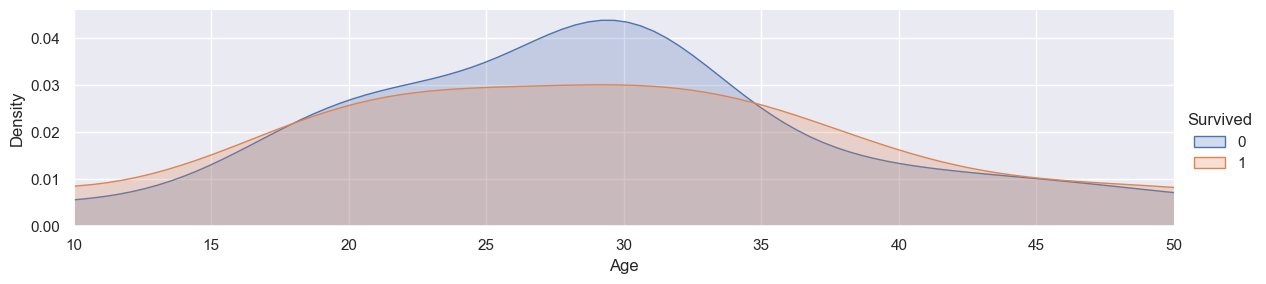

In [36]:
#it generates two kernel density estimation(KDE) plots using seaborn's FacetGrid to visualize the distribution of ages among passengers who survived
facet = sns.FacetGrid(train, hue="Survived",aspect=4) #initializes object named facet, plots will be color-coded based on the 'Survived' col, aspect ratio as 4
facet.map(sns.kdeplot,'Age',fill= True) #maps KDE plots onto the FacetGrid
facet.set(xlim=(0, train['Age'].max())) #sets the limits of the x-axis (age) 0 to the maximum age present in the train Df
facet.add_legend() #to distinguish between the KDE plots for passengers who survived and who died
plt.show() #displays

facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend() 
plt.xlim(10,50) #to show only ages between 10 and 50 years


Plotting stuff


Those who were **20 to 30 years old** were **more dead and more survived.**


In [37]:
train.info() #summary information about the df train (index info, col info like non null, datatype)
test.info() #summary information about the df test (index info, col info like non null, datatype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

**Binning**

Binning/Converting Numerical Age to Categorical Variable

feature vector map:

- child: 0
- young: 1
- adult: 2
- mid-age: 3
- senior: 4


In [38]:
train.head() #prints the first few rows of train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


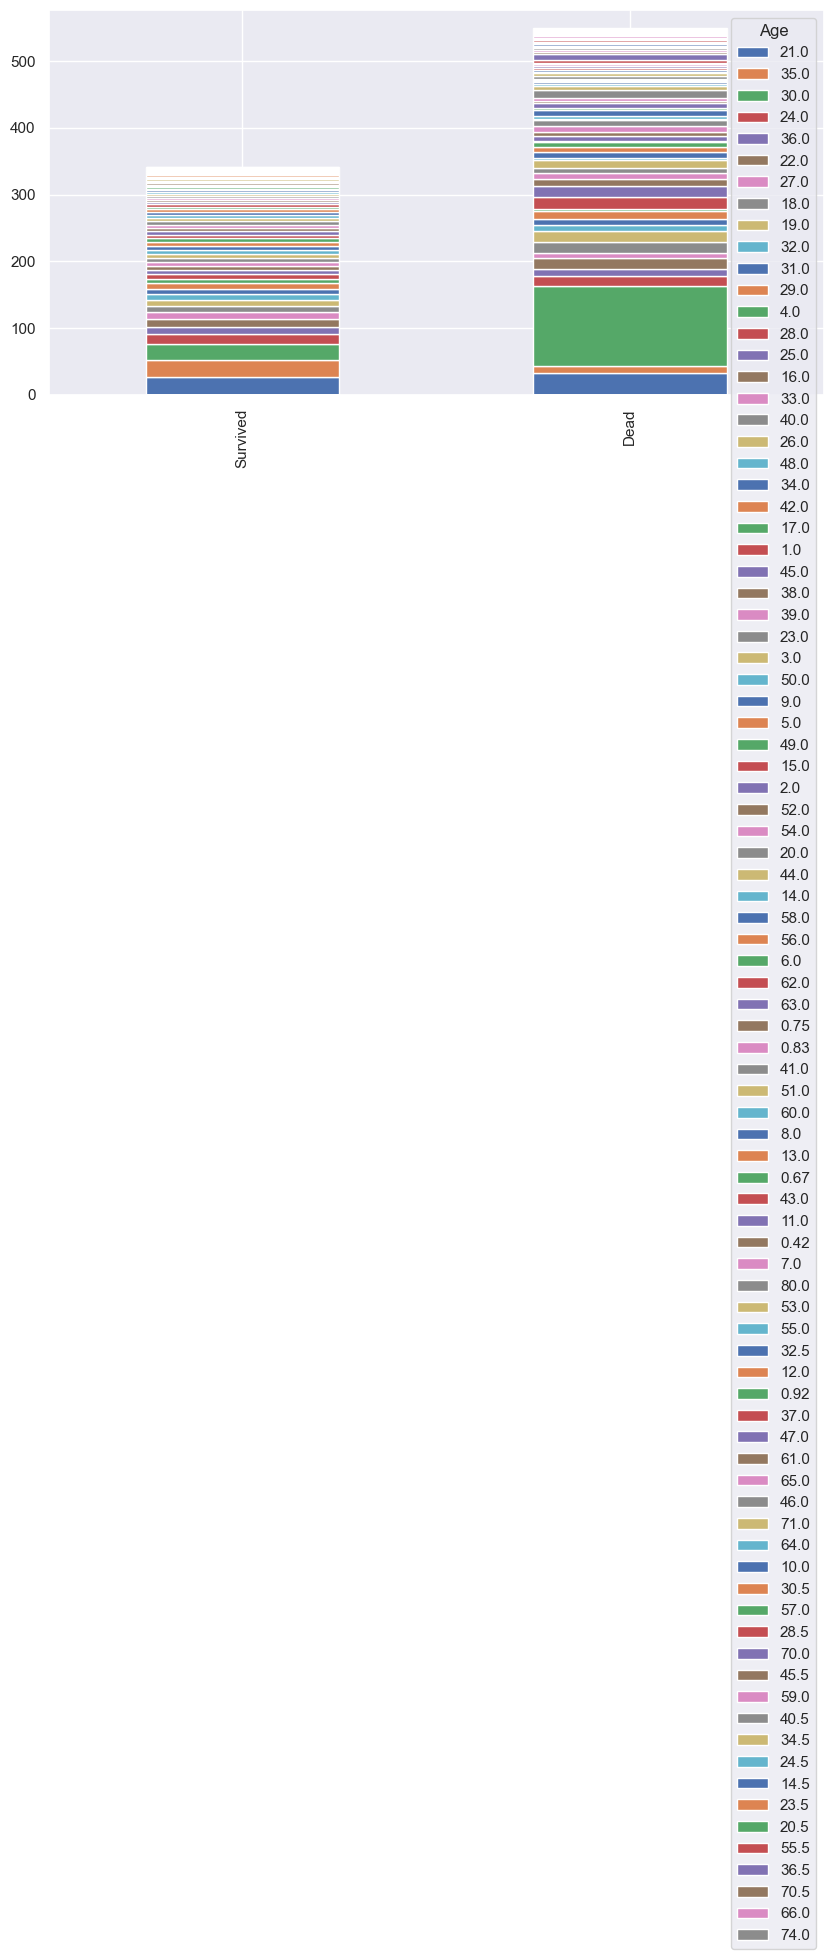

In [39]:
train.head()
bar_chart('Age') #barchart of age

In [40]:

# print(train_test_data)
# train_test_data["Age"] = train_test_data['Age'].map({})

# train_test_data['Age'] = 
#categorizes the 'Age' values into different age groups and assigns a numerical label to each group for test and train
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[dataset['Age'] > 62, 'Age'] = 4
    #code categorizes passengers into five age groups based on the age ranges
# for dataset in train_test_data:
#     dataset.loc[]
#train[train['Age'].isin([23])]

Inside each dataset in traindataset, change the value of Age as 0,1,2,3,4 depending upon the data


Defining Age ranges as that determines the sruvivability


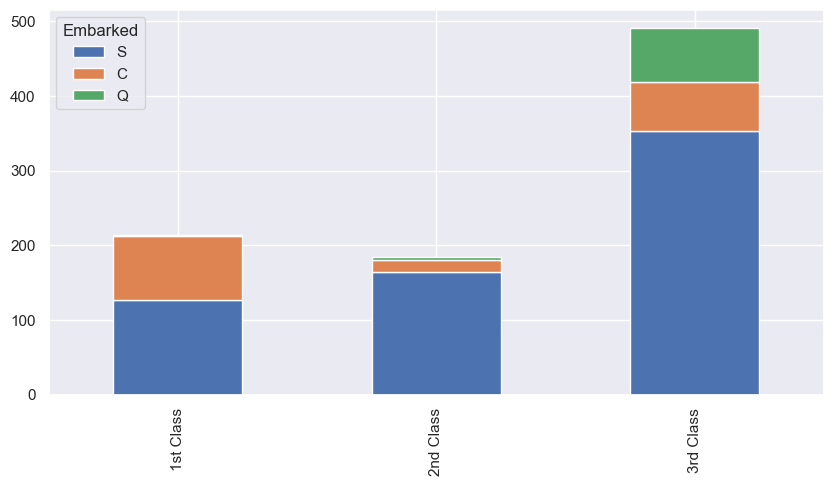

Pclass1:
 Embarked
S    127
C     85
Q      2
Name: count, dtype: int64
Pclass2:
 Embarked
S    164
C     17
Q      3
Name: count, dtype: int64
Pclass3:
 Embarked
S    353
Q     72
C     66
Name: count, dtype: int64


In [41]:
#creates a stacked bar plot to visualize the distribution of the 'Embarked' feature among different passenger classes ('Pclass')
Pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts() # filters the train Df to select only rows where 'Pclass' is equal to 1 (1st class passengers).Then it counts the occurrences of each unique value in the 'Embarked' column for these rows.
Pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3]) #Each row of the Df represents a different passenger class, and each column represents a different port of embarkation.
df.index = ['1st Class','2nd Class','3rd Class'] # line sets the index of the df to indicate the passenger classes
df.plot(kind = 'bar', stacked =  True, figsize=(10,5)) #generates a stacked bar plot using the DataFrame df
plt.show() #displays
print("Pclass1:\n",Pclass1) #prints the count of passengers for each emb..
print("Pclass2:\n",Pclass2)
print("Pclass3:\n",Pclass3)

more than 50 % of 1st class are from S embark.  
more than 50 % of 2st class are from S embark.  
more than 50 % of 3st class are from S embark.

**fill out missing embark with S embark**


Filling all empty cells with S as embark as most people are from there


In [42]:
#fills missing values in the 'Embarked' column of both the train and test Df with the value 'S', which represents Southampton (one of the ports of embarkation).
for dataset in train_test_data:
    dataset['Embarked'] =  dataset['Embarked'].fillna('S')

In [43]:
train.head() #prints the first few lines of train df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [44]:
embarked_mapping = {'S':0,'C':1,'Q':2} #it maps the categorical values in the 'Embarked' column to numerical values
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping) #according to the dict it maps the values in the 'Embarked' column 

Mapping the place they embarked from as 0,1,2 to clean the data that has to be fed into the ML algo


In [45]:
# train["Fare"].fillna(train.groupby("Pclass")["Fare"])
# train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace = True)
# test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace = True)
# train.head(50)

# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True) #.groupby("Pclass")["Fare"]: groups the Df by the 'Pclass' column and selects the 'Fare' column for further operations.
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)


C:\Users\91809\AppData\Local\Temp\ipykernel_31960\1030873029.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
C:\Users\91809\AppData\Local\Temp\ipykernel_31960\1030873029.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


Sukhada Explaaaaiiiinnnn sure :/


c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


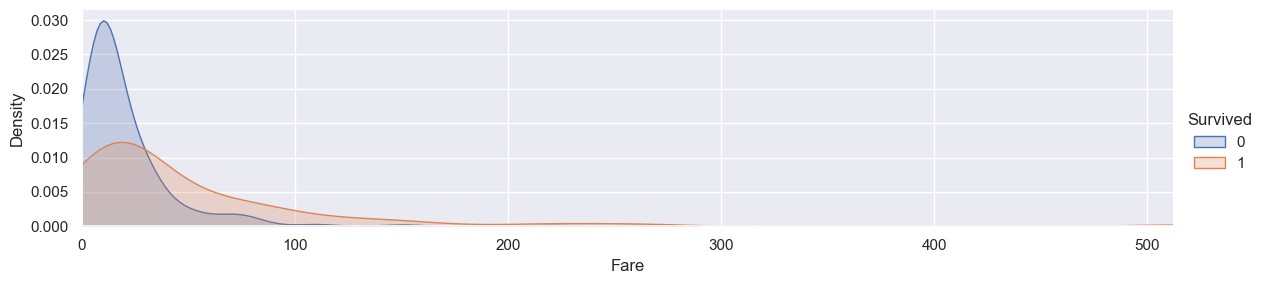

In [46]:
#(KDE) plot to visualize the distribution of fares among passengers who survived and those who did not
facet = sns.FacetGrid(train, hue="Survived",aspect=4 ) # hue - plots will be color-coded based on the 'Survived' column, aspect ratio as 4
facet.map(sns.kdeplot, 'Fare', shade = True) #maps KDE plots onto the FacetGrid and separate plots for passengers who survived and those who did not
facet.set(xlim = (0, train['Fare'].max())) # sets the limits of the x-axis (fare) from 0 to the max fare present in the train Df
facet.add_legend() #to distinguish between the KDE plots for passengers who survived and died.
plt.show() #displays

c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 20.0)

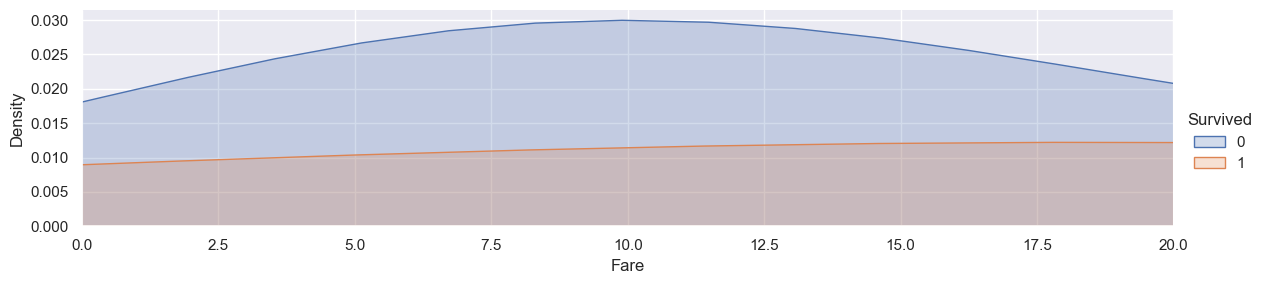

In [47]:
#(KDE) plot to visualize the distribution of fares among passengers who survived and those who did not
facet = sns.FacetGrid(train, hue="Survived",aspect=4) # hue - plots will be color-coded based on the 'Survived' column, aspect ratio as 4
facet.map(sns.kdeplot,'Fare',shade= True) #maps KDE plots onto the FacetGrid and separate plots for passengers who survived and those who did not
facet.set(xlim=(0, train['Fare'].max())) # sets the limits of the x-axis (fare) from 0 to the max fare present in the train Df
facet.add_legend() #to distinguish between the KDE plots for passengers who survived and died.
plt.xlim(0, 20) #displays

In [48]:
#categorizes the 'Fare' values into different fare groups and assigns a numerical label to each group
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[dataset['Fare'] >= 100, 'Fare'] = 3
#The code divides the fare values into four discrete fare groups based on the fare ranges

<h4>aa</h4>
Mapping dataset in train_test_data to 0, 1, 2, 3.

In [49]:
train.head() #prints the first few lines of train df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [50]:
train.Cabin.value_counts() #counts of unique values in the 'Cabin' column of the train DataFrame. 

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [51]:
#Truncating the cabin codes to only include the first letter reduces the complexity of the data
for dataset in train_test_data:
    dataset['Cabin'] =  dataset['Cabin'].str[:1] #.str[:1] accessor to extract the first character from each value in the 'Cabin' column, [:1] slices the string to extract the first character.

<Axes: >

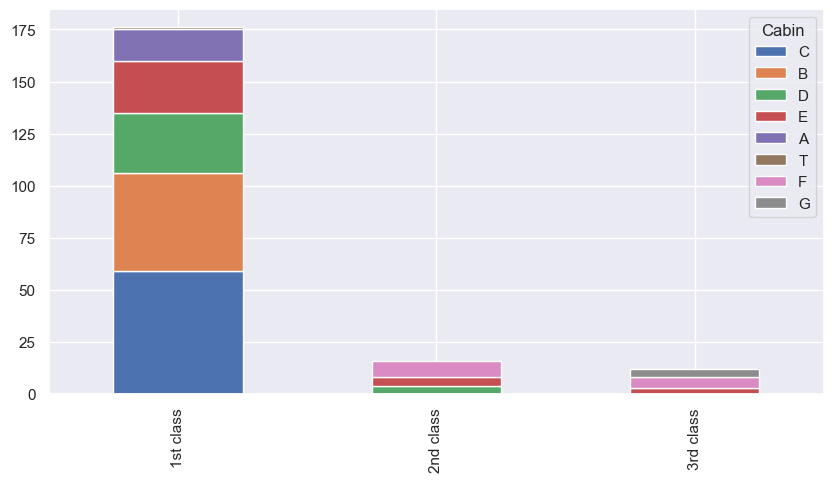

In [52]:
#creates a stacked bar plot to visualize the distribution of cabin letters among different passenger classes ('Pclass') 
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts() #sameee
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))
#it helps understand how the distribution of cabin letters varies across different passenger classes

From the above graph we can infer that people that were in 1st class were more likely to sruvive, compared to other classes

In [53]:
#maps the categorical cabin letters to numerical values
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping) #maps it

In [54]:
# fill missing Fare with median fare for each Pclass (the median cabin value corresponding to each passenger class 'Pclass')
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

C:\Users\91809\AppData\Local\Temp\ipykernel_31960\2600729139.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
C:\Users\91809\AppData\Local\Temp\ipykernel_31960\2600729139.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

**family Size**


In [55]:
#represents the total number of family members a passenger has onboard
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1 #add
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 11.0)

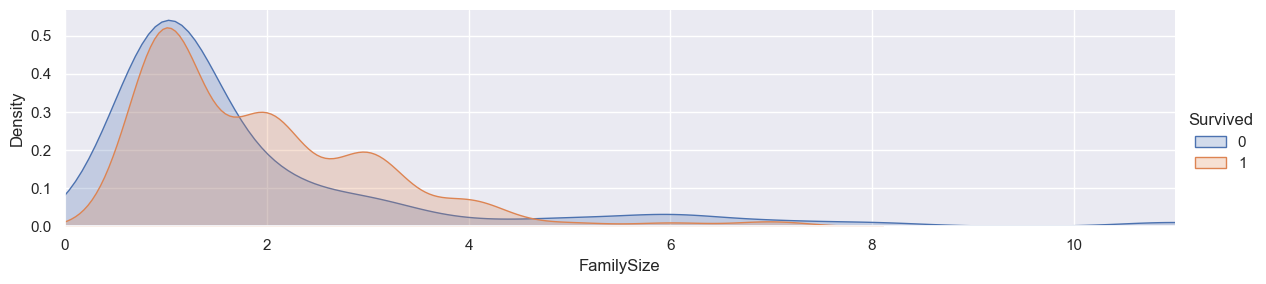

In [56]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4) # hue - plots will be color-coded based on the 'Survived' column, aspect ratio as 4
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend() #to distinguish between the KDE plots for passengers who survived and died.
plt.xlim(0) #line sets the lower limit of the x-axis to 0, ensuring that the KDE plot starts from zero on the x-axis

In [57]:
#maps the numerical values representing family sizes to categorical values 
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

Family mapping depending upon number of people


In [58]:
train.head() #prints the first few lines of train df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [59]:
features_drop = ['Ticket','SibSp','Parch'] #drops from the dataset
train = train.drop(features_drop, axis = 1) 
test = test.drop(features_drop,axis=1)
train = train.drop(['PassengerId'], axis=1)

Deleting all these values as they are not necessary

- sibsp and parch have been added to FamilySize and hence not needed anymore

- Passenger Id not needed to be trained in ML model so removed


In [60]:
#prepares the data for modeling by separating the features (independent variables) from the target variable ('Survived')
train_data = train.drop('Survived', axis = 1) #line creates a new Df by dropping the 'Survived' column from the train Df along the columns (axis=1).
target = train['Survived'] #line extracts the 'Survived' column and assigns it to the variable target 
train_data.shape, target.shape #returns the shape ( rows (instances) and columns (features) ) of the train_data DataFrame.
#It indicates the no. of elements (rows) in the Series, which should be the same as the number of rows in train df - target shape

((891, 8), (891,))

We need to check If passenger survived or not, so we delete that column data from the train.csv file and then feed it to the ML model


In [61]:
train_data.head(10) #prints the first 10 lines of train_data

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


First 10 rows printed


# 5. Modelling


In [62]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

Importing Stuff


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


# 6.Cross Validation(k-fold)


In [64]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

Importing Stuff

k_fold ?


In [65]:
clf = KNeighborsClassifier(n_neighbors=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target.to_numpy(), cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.78651685 0.82022472 0.83146067 0.85393258 0.83146067
 0.84269663 0.80898876 0.83146067 0.83146067]


calling multiple ML models and checking for each of their accuracy to compare which one is the best


In [66]:
#learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
accuracy = []

#this is a list of all the ML classes that are being used
clf = [KNeighborsClassifier(n_neighbors = 13),DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=13),GaussianNB(),SVC(),ExtraTreeClassifier(),
      GradientBoostingClassifier(n_estimators=10, learning_rate=1,max_features=3, max_depth =3, random_state = 10),AdaBoostClassifier(),ExtraTreesClassifier()]

#List of all the ML classes in string, this is used to print the name of the classifier in  the graph
labels = ['KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GaussianNB', 'SVC', 'ExtraTreeClassifier', 'GradientBoostingClassifier', 'AdaBoostClassifier', 'ExtraTreesClassifier']

#This function is used to fit the model and calculate the accuracy of the model and store it in the accuracy list
def model_fit():
    scoring = 'accuracy'
    for i in range(len(clf)):
        score = cross_val_score(clf[i], train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
        print("Score of Model",i,":",round(np.mean(score)*100,2))
        accuracy.append(round(np.mean(score)*100,2))    
#     round(np.mean(score)*100,2)
#     print("Score of :\n",score)
model_fit()


Score of Model 0 : 82.6
Score of Model 1 : 79.91


Score of Model 2 : 81.03
Score of Model 3 : 78.78
Score of Model 4 : 83.5
Score of Model 5 : 79.69
Score of Model 6 : 81.25


c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boos

Score of Model 7 : 81.03
Score of Model 8 : 81.15


In [67]:
print(max(accuracy))

83.5


printing the maximum accuracy in the given list


In [68]:
labels = ['KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GaussianNB', 'SVC', 'ExtraTreeClassifier', 'GradientBoostingClassifier', 'AdaBoostClassifier', 'ExtraTreesClassifier']

def create_bar_chart(data, labels, title="Survivability Graph", xlabel="Machine Learning Models", ylabel="Accuracy(%)"):
    x = np.arange(len(labels))

    fig, ax = plt.subplots()
    bars = ax.bar(x, data)
    ax.set_xticks(x)
    
    # Adjust the rotation and alignment of the labels
    ax.set_xticklabels(labels, rotation=45, ha='right')  
    
    # Set the y-axis limits
    ax.set_ylim(60, 100)  
    
    # Find the index of the highest bar
    #argmax gives us the index of the highest value in the array
    highest_index = np.argmax(data)
    
    # Set the color of the highest bar to red
    bars[highest_index].set_color('#69BC69')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

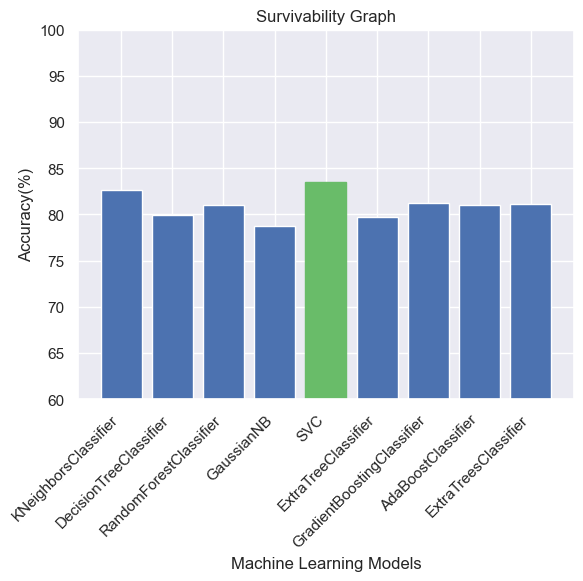

In [69]:
create_bar_chart(accuracy, labels)

calling all algorithms and adding them to a list


In [70]:
clf1 = SVC()
clf1.fit(train_data, target)
test
test_data = test.drop(['Survived','PassengerId'], axis=1)
prediction = clf1.predict(test_data)
# test_data


- Survived and PassengerID deleted from test-data

- Classifying the prediction


In [71]:
test_data['Survived'] = prediction
submission = pd.DataFrame(test['PassengerId'],test_data['Survived'])
submission.to_csv("Submission.csv")

- Inside test data, survived column is filled with prediction

- DataFrame of PassengerID and Survived

- Creating a new csv file called submission.csv

- .to_csv assigns all the data from submission to the new CSV
